In [11]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [79]:
plt.rcParams.update({'font.size': 12})

In [126]:
iris = load_iris() # загружаем датасет
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [128]:
df.columns = ['sepal length','sepal width','petal length','petal width']

In [129]:
df.head(5)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [133]:
X = df.loc[:, ['sepal length','sepal width']].values   # выбираем два столбца для определения кластеров

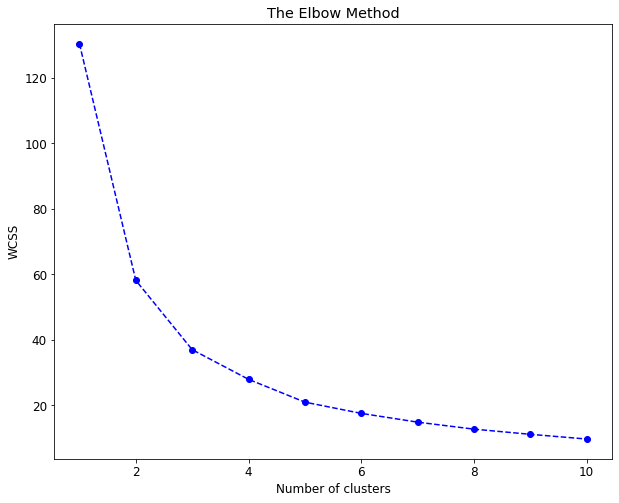

In [136]:
from sklearn.cluster import KMeans   #импорт метода
#строим график для выбора кол-ва кластеров кластеров
wcss = []     
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')  
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), wcss, linestyle='--', marker='o', color='b')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [137]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')   
y_kmeans = kmeans.fit_predict(X)

In [42]:
new_df = pd.concat([df,op], axis=1)
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [31]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

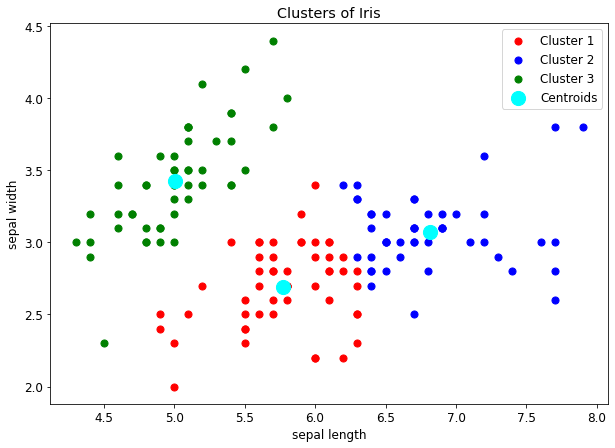

In [139]:
plt.figure(figsize=(10,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'cyan', label = 'Centroids')
plt.title('Clusters of Iris')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [141]:
clusters = pd.Series(kmeans.labels_)

In [150]:
new_df = pd.concat([df,clusters], axis=1)
new_df.columns = ['sepal length','sepal width','petal length','petal width', 'clustr']
new_df['clustr'] = new_df['clustr'].replace([0,1,2],['red','green','blue'])
new_df

,sepal length,sepal width,petal length,petal width,clustr
0,5.1,3.5,1.4,0.2,blue
1,4.9,3.0,1.4,0.2,blue
2,4.7,3.2,1.3,0.2,blue
3,4.6,3.1,1.5,0.2,blue
4,5.0,3.6,1.4,0.2,blue
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,green
146,6.3,2.5,5.0,1.9,red
147,6.5,3.0,5.2,2.0,green
148,6.2,3.4,5.4,2.3,green
